In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Likelihood(x,y, error, theta, modelo): #Función para calcular el logLikelihood el cual asumimos gaussiano
    L = 0
    for i in range(len(x)):
        L += -(y[i]-modelo[i])**2/(error[i]**2)
    return L    

In [3]:
def Prior(theta): #Función para el prior plano
    for i in range(len(theta)):
        if (theta[i]<=prior[i+1] and theta[i]>=prior[i]):
            return 0
        else:
            return -np.infty

In [21]:
def sampler(theta_i, x, y,error,n): #Algoritmo de MCMC que recibe como variables los parámetros iniciales (guess), y los datos a ajustar, además del número de veces que se repetirá el algoritmo
    cadena = np.array(theta_i)

    for i in range(n):
        theta_trial = [np.random.normal(theta_i[0],.01),np.random.normal(theta_i[1],.01)]
        log_P_i = Likelihood(x,y,error,theta_i,theta_i[0]*x+theta_i[1])+Prior(theta_i)
        log_P_trial =  Likelihood(x,y,error,theta_trial,theta_trial[0]*x+theta_trial[1]) + Prior(theta_trial)
    
        log_p_acc = min(0, log_P_trial-log_P_i)
    
        if np.exp(log_p_acc) > np.random.rand():
            theta_i = theta_trial
            cadena = np.vstack((cadena,theta_trial))
    return cadena

In [22]:
theta_i = [0,0]
prior = [-2,2,-5,5]
x = np.linspace(0,10,100)
y = 1*x+3

In [24]:
cadena1 = sampler(theta_i, x, y,np.ones(len(x)), 100000)

In [25]:
cadena1.shape

(74783, 2)

Text(0.5, 1.0, 'y = $\\Theta_{0}+\\Theta_{1}x$')

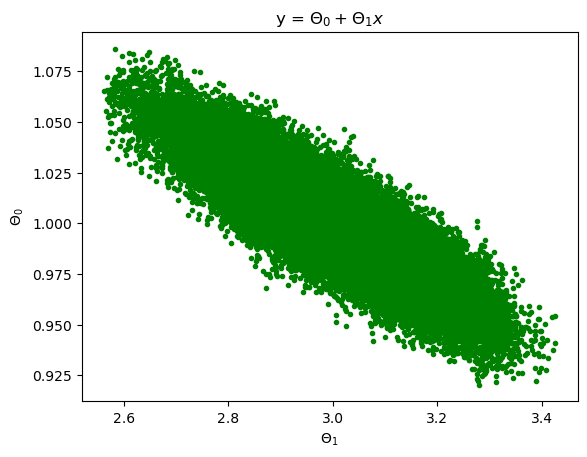

In [27]:
plt.scatter(cadena1[10000:,1:], cadena1[10000:,0:1], marker = '.', color = 'green')
plt.xlabel('$\Theta_1$')
plt.ylabel('$\Theta_0$')
plt.title('y = $\Theta_{0}+\Theta_{1}x$')
#plt.xlim(-1,1)
#plt.ylim(-3,3)

In [9]:
pip install corner

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Loading egg at /global/u1/d/dgonz/.local/perlmutter/python-3.11/lib/python3.11/site-packages/classy-3.2.2-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#graficar con corner y getdist

In [10]:
import corner

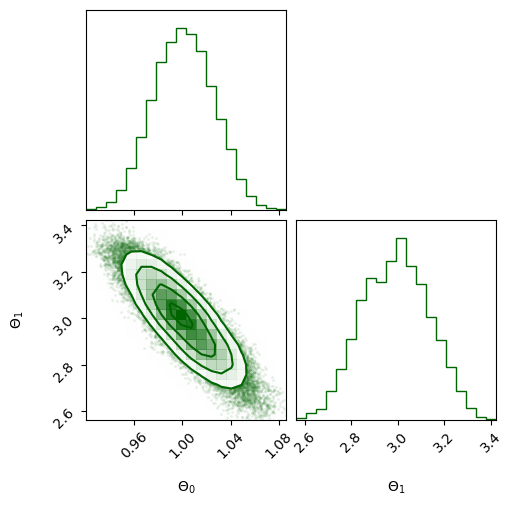

In [28]:
figure2 = corner.corner(cadena1[10000:], smooth = True, bins = 20, color = 'darkgreen', labels = ['$\Theta_{0}$','$\Theta_{1}$'])

In [15]:
data = np.loadtxt("line_data.txt") #dataset (local)

In [16]:
data #imprimimos el dataset con formato [x,y,error]

array([[ 5.96778966e-01,  7.66785992e+00,  1.60314333e-01],
       [ 9.21049399e-01,  3.41672449e+00,  5.13170400e-01],
       [ 1.15618395e+00,  4.55474606e+00,  4.01530064e-01],
       [ 1.75451756e+00,  9.76484439e-01,  3.72534003e-01],
       [ 1.82491730e+00,  3.03349655e+00,  2.71381917e-01],
       [ 2.26851454e+00,  3.33309959e+00,  2.52060395e-01],
       [ 2.28263231e+00,  1.86291370e+00,  3.08511106e-01],
       [ 2.50455365e+00,  2.66588250e+00,  4.40650383e-01],
       [ 2.86139335e+00,  9.23536851e-01,  5.37728421e-01],
       [ 2.93714046e+00,  9.97301792e-01,  3.55211169e-01],
       [ 3.12261223e+00,  1.36334351e+00,  4.34656891e-01],
       [ 3.17285482e+00,  1.01729190e+00,  3.92968276e-01],
       [ 3.22958914e+00,  1.59994511e+00,  4.12451751e-01],
       [ 3.43178016e+00,  1.34476290e-01,  4.37344525e-01],
       [ 3.61788656e+00,  2.98903651e-01,  5.21171219e-01],
       [ 3.92117518e+00,  8.26069610e-01,  1.41597494e-01],
       [ 3.98044255e+00, -7.78864401e-02

Text(0, 0.5, 'y')

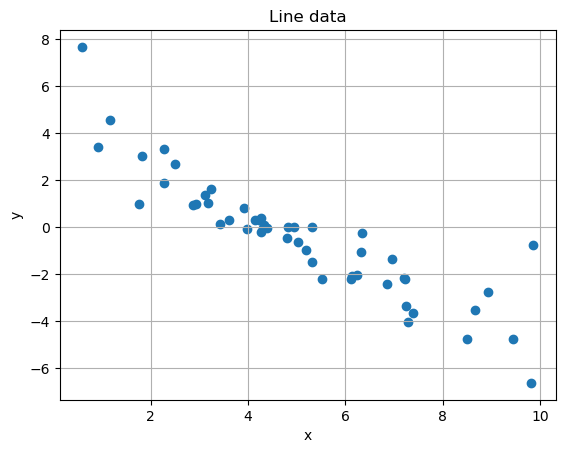

In [17]:
plt.scatter(data[:,0:1],data[:,1:2]) #grafico x y y para poder ver el comportamiento de los datos y proponer un prior
plt.grid()
plt.title('Line data')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
#Notamos que la pendiente es negativa y que además los valores de x son positivos, proponemos un prior con estas características

In [29]:
theta_i = [-1,6]
prior = [-4,0,0,10] #[min(m),max(m),min(b),max(b)]
chain = sampler(theta_i, data[:,0:1], data[:,1:2],data[:,2:], 100000)

In [30]:
chain.shape

(46701, 2)

Text(0.5, 1.0, '$y = \\Theta_{0}x+\\Theta_{1}$')

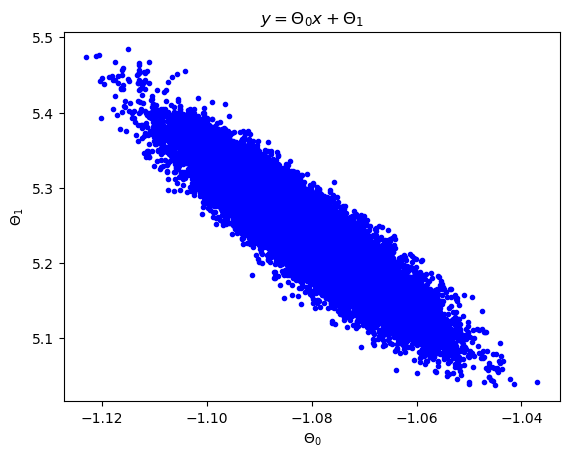

In [32]:
plt.scatter(chain[20000:,0:1], chain[20000:,1:], marker = '.', color = 'blue')
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
plt.title(r'$y = \Theta_{0}x+\Theta_{1}$')

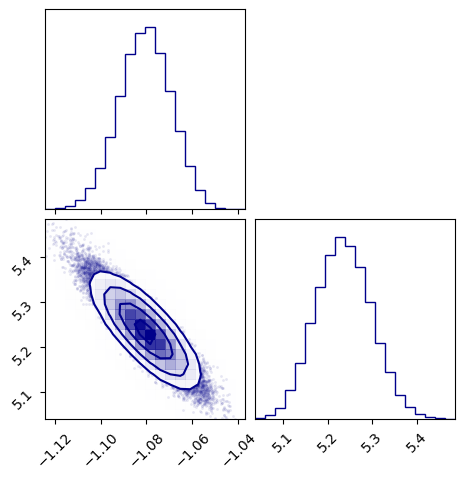

In [33]:
fig = corner.corner(chain[10000:], color = 'darkblue', smooth = True)

In [36]:
#imprimo la media de la pendiente y la ordenada:

print('m = ',np.mean(chain[20000:,0:1]),'b = ',np.mean(chain[20000:,1:]))

m =  -1.0798022133665306 b =  5.232004387343874


Text(0.5, 1.0, 'y = -1.08x+5.24')

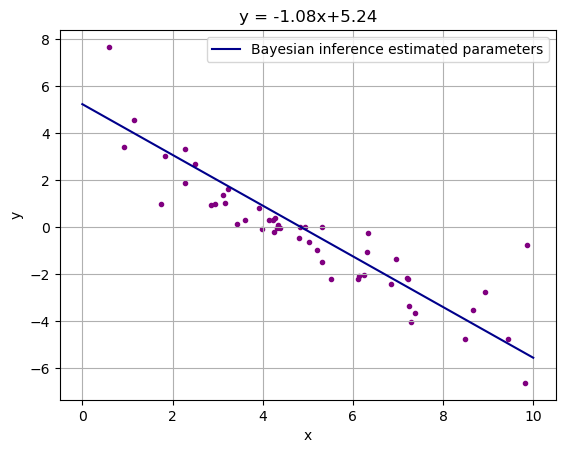

In [38]:
plt.scatter(data[:,0:1], data[:,1:2], color = 'purple', marker = '.')
x = np.linspace(0,10,100)
plt.plot(x, -1.08*x+5.23, color = 'darkblue', linestyle = '-', label = 'Bayesian inference estimated parameters')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = -1.08x+5.24')

**Ahora implementamos este algoritmo en el problema de las distancias de quasares**

Our model for the distance modulus is given by:

$\mu = 5\log_{10}\left(\frac{d_{L}}{Mpc}\right)+25$

where:

$d_{L} = d_{p}(1+z)$

or:

$d_{L} = (1+z)\frac{c}{H_{0}}\int_{a_{e}}^{a_{0}=1}\frac{da'}{\sqrt{\Omega_{M,0}a'+\Omega_{\gamma,0}+\Omega_{\Lambda}a'^{4}}}$

then, our complete model:

$\mu = 5\log_{10}\left(\frac{(1+z)\frac{c}{H_{0}}\int_{a_{e}}^{a_{0}=1}\frac{da'}{\sqrt{\Omega_{M,0}a'+\Omega_{\gamma,0}+\Omega_{\Lambda}a'^{4}}}}{Mpc}\right)+25$

In [39]:
data = np.genfromtxt('https://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt')
data.shape

(580, 5)

In [40]:
z = data[:,1:2] #redshift
mu = data[:,2:3] #Distance modulus
mu_err = data[:,3:4] #Distance modulus error

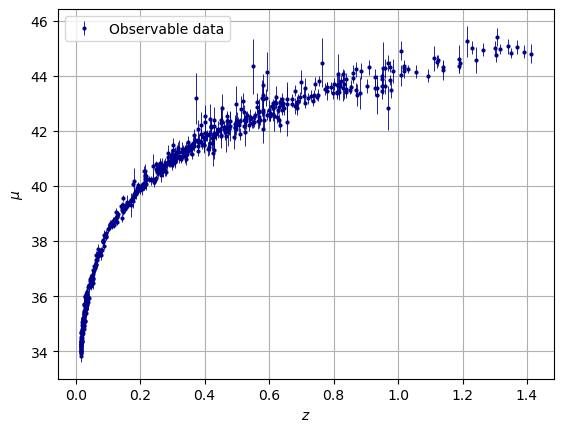

In [41]:
#Imrpimimos los datos de quasares
plt.errorbar(z.flatten(), mu.flatten(), yerr = mu_err.flatten(), fmt = '.', color = 'darkblue', label = 'Observable data', linewidth = 0.6, ms = 4)
plt.legend()
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.grid()

In [51]:
def simpson(params, z):
    y = 1/(np.sqrt((1/(1/(1+z)))+(1-1)))
    I = ((1-(1/(1+z)))/6)*((1/( (params[0]*(1/(1+z)))+(params[1]*((1/(1+z))**4))))+4*(1/((params[0]*((1/(1+z))+1))+(params[1]*(((1/(1+z))+1**4)))))+(1/((params[0]*1)+(params[1]*(1**4)))))
    return (c/H_0)*I

In [50]:
def model(params, z):
    I = np.zeros(len(z))
    d_l = np.zeros(len(z))
    for i in range(len(z)):
        I[i] = simpson(params,z[i])
        d_l[i] =(I[i]/(1/(1+z[i])))
    mu_model = 5*np.log10(d_l)+25
    return mu_model

In [44]:
def Likelihood(x,y, error, theta): #Función para calcular el logLikelihood el cual asumimos gaussiano
    L = 0
    modelo = model(theta,z)
    for i in range(len(x)):
        L += -(y[i]-modelo[i])**2/(error[i]**2)
    return L  

In [76]:
from tqdm import tqdm

In [66]:
def sampler(theta_i, x, y,error,n): #Algoritmo de MCMC que recibe como variables los parámetros iniciales (guess), y los datos a ajustar, además del número de veces que se repetirá el algoritmo
    cadena = np.array(theta_i)

    for i in tqdm(range(n)):
        theta_trial = [np.random.normal(theta_i[0],.05),np.random.normal(theta_i[1],.05)]
        log_P_i = Likelihood(x,y,error,theta_i)+Prior(theta_i)
        log_P_trial =  Likelihood(x,y,error,theta_trial) + Prior(theta_trial)
    
        log_p_acc = min(0, log_P_trial-log_P_i)
    
        if np.exp(log_p_acc) > np.random.rand():
            theta_i = theta_trial
            cadena = np.vstack((cadena,theta_trial))

    return cadena

In [46]:
theta_i = [0.5, 0.7] #[omega_m, omega_lambda]
prior = [0,1,0,1]
c = 300000
H_0 = 70

In [ ]:
chain_QSO = sampler(theta_i, z, mu, mu_err,100000)

  0%|          | 248/100000 [00:14<1:38:52, 16.81it/s]

In [82]:
chain_QSO.shape

(1302, 2)

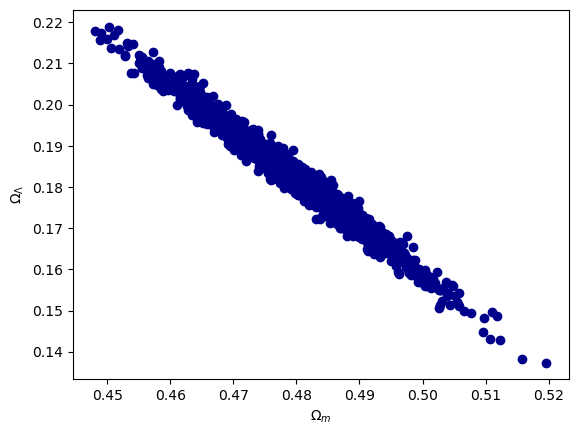

In [110]:
plt.scatter(chain_QSO[100:,0:1],chain_QSO[100:,1:2], marker = 'o', color = 'darkblue')
plt.xlabel('$\Omega_m$')
plt.ylabel('$\Omega_\Lambda$')
#plt.grid()
plt.savefig('PEPE')
#plt.xlim(0,1)
#plt.ylim(0,1)

In [106]:
corner.corner?

Signature:
corner.corner(
    data,
    bins=20,
    *,
    range=None,
    axes_scale='linear',
    weights=None,
    color=None,
    hist_bin_factor=1,
    smooth=None,
    smooth1d=None,
    labels=None,
    label_kwargs=None,
    titles=None,
    show_titles=False,
    title_quantiles=None,
    title_fmt='.2f',
    title_kwargs=None,
    truths=None,
    truth_color='#4682b4',
    scale_hist=False,
    quantiles=None,
    verbose=False,
    fig=None,
    max_n_ticks=5,
    top_ticks=False,
    use_math_text=False,
    reverse=False,
    labelpad=0.0,
    hist_kwargs=None,
    group='posterior',
    var_names=None,
    filter_vars=None,
    coords=None,
    divergences=False,
    divergences_kwargs=None,
    labeller=None,
    **hist2d_kwargs,
)
Docstring:
Make a *sick* corner plot showing the projections of a data set in a
multi-dimensional space. kwargs are passed to hist2d() or used for
`matplotlib` styling.

Parameters
----------
data : obj
    Any object that can be converted t

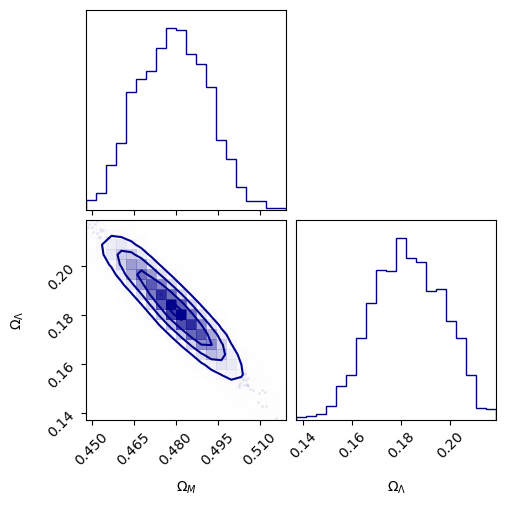

In [109]:
corner.corner(chain_QSO[100:], smooth = True, color = 'darkblue', labels = ['$\Omega_{M}$','$\Omega_\Lambda$']);
plt.savefig('PP2')

In [68]:
import warnings
warnings.filterwarnings("ignore")

In [120]:
#imprimo el valor medio de ambos parámetros para graficar el modelo:

print('Los valores inferidos son:\n', '$\Omega_{M}$: ', np.mean(chain_QSO[100:,0:1]), '$\Omega_{\Lambda}$: ', np.mean(chain_QSO[100:,1:]))

Los valores inferidos son:
 $\Omega_{M}$:  0.4791802002246502 $\Omega_{\Lambda}$:  0.1830665506454762


In [121]:
#imprimimos los datos y el modelo con esos parámetros inferidos:

modelo = model([np.mean(chain_QSO[100:,0:1]),np.mean(chain_QSO[100:,1:])], z)

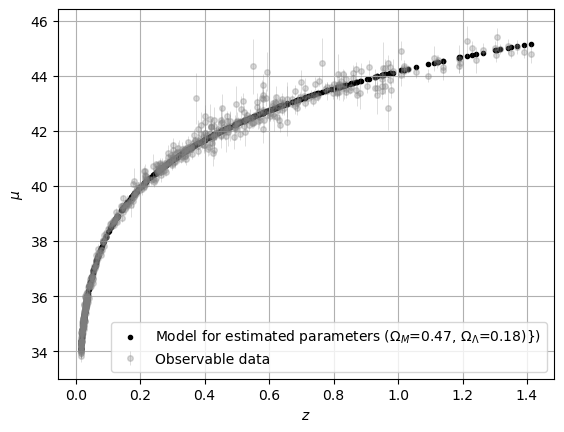

In [146]:
plt.scatter(z,modelo, marker = '.', color = 'black',alpha = 1,  label = 'Model for estimated parameters ($\Omega_{M}$=0.47, $\Omega_{\Lambda}$=0.18)})')
plt.errorbar(z.flatten(), mu.flatten(), yerr = mu_err.flatten(), fmt = 'o', color = 'gray',alpha = 0.3, label = 'Observable data', linewidth = 0.6, ms = 4)
plt.legend()
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.grid()
plt.savefig('PP_comparisson')